# Neural Networks

1. Multilayer Perceptron - MNIST Handwritten Numbers
2. Convolutional Neural Networks - 
3. Recurrent Neural Networks - 

## Multilayer Perceptron

In the end we get 98% accuracy. Pretty good!

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

learning_rate = 0.0005  # how quickly to learn
training_epochs = 25
batch_size = 128

n_classes = 10  # MNIST total classes (0 - 9 digits)
n_samples = mnist.train.num_examples  # (how many images)

n_input = 784  # MNIST data input (img shape is 28x28)

n_hidden_1 = 512  # 1st layer number of neurons
n_hidden_2 = 256  # 2nd layer number of neurons

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def multilayer_perceptron(x, weights, biases):#, keep_prob):
    '''
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: Dictionary of bias values
    '''
    # First hidden layer with RELU activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(X * W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
     

    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [5]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: Dictionary of bias values
    '''
    # First hidden layer with dropout
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer with dropout
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output layer
    out_layer = tf.sigmoid(tf.matmul(layer_2, weights['out']) + biases['out'])
    return out_layer

In [6]:
weights = {
    'h1':  tf.Variable(tf.random_normal([n_input,    n_hidden_1], stddev=(1/tf.sqrt(float(n_input))))),
    'h2':  tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=(1/tf.sqrt(float(n_input))))),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],  stddev=(1/tf.sqrt(float(n_input)))))
}

biases = {
    'b1':  tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':  tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

# add dropout layer
keep_prob = tf.placeholder(tf.float32)

pred = multilayer_perceptron(x, weights, biases)#, keep_prob)

#cost = tf.reduce_mean(
#    tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

regularizer_rate = 0.1
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(biases['b1'])) + tf.reduce_sum(tf.square(biases['b2'])))

optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.InteractiveSession()

init = tf.global_variables_initializer()

sess.run(init)

# 15 loops as we set training_epochs = 15
for epoch in range(training_epochs):
    # Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        # Feed a value < 1.0 to keep prob during training
        _, c = sess.run([optimiser, cost], feed_dict={
                        x: batch_x, y: batch_y, keep_prob: 1})
        avg_cost += c/total_batch
    print("Epoch {}: cost={:.4f}".format(epoch+1, avg_cost))
print("Model has completed {} Epochs of training".format(training_epochs))


correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))  # checks if x==y?
correct_pred = tf.cast(correct_pred, 'float')
accuracy = tf.reduce_mean(correct_pred)
# feed a value of 1.0 to keep prob
accuracy.eval({x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})

Epoch 1: cost=64.1766
Epoch 2: cost=46.1122
Epoch 3: cost=33.3201
Epoch 4: cost=24.0972
Epoch 5: cost=17.4217
Epoch 6: cost=12.5988
Epoch 7: cost=9.1359
Epoch 8: cost=6.6735
Epoch 9: cost=4.9475
Epoch 10: cost=3.7571
Epoch 11: cost=2.9502
Epoch 12: cost=2.4115
Epoch 13: cost=2.0568
Epoch 14: cost=1.8264
Epoch 15: cost=1.6789
Epoch 16: cost=1.5868
Epoch 17: cost=1.5305
Epoch 18: cost=1.4981
Epoch 19: cost=1.4804
Epoch 20: cost=1.4721
Epoch 21: cost=1.4680
Epoch 22: cost=1.4662
Epoch 23: cost=1.4655
Epoch 24: cost=1.4654
Epoch 25: cost=1.4650
Model has completed 25 Epochs of training


0.98

In [7]:
import numpy as np
import sklearn as sk

#metrics
y_p = tf.argmax(pred, 1)
val_accuracy, y_pred = sess.run([accuracy, y_p], feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})

print("validation accuracy:", val_accuracy)
y_true = np.argmax(mnist.test.labels,1)
print("Precision", sk.metrics.precision_score(y_true, y_pred, average='micro'))
print("Recall", sk.metrics.recall_score(y_true, y_pred, average='micro'))
print("f1_score", sk.metrics.f1_score(y_true, y_pred, average='micro'))
print("confusion_matrix")
print(sk.metrics.confusion_matrix(y_true, y_pred))

validation accuracy: 0.98
Precision 0.98
Recall 0.98
f1_score 0.98
confusion_matrix
[[ 973    0    0    1    1    1    0    1    3    0]
 [   0 1126    3    1    0    0    2    1    2    0]
 [   4    2 1004    1    5    1    0    8    6    1]
 [   0    0    2  987    0    8    1    6    3    3]
 [   1    0    2    1  964    0    3    1    0   10]
 [   3    0    0    4    2  876    3    1    2    1]
 [   4    2    2    1    5    9  932    0    3    0]
 [   1    4    5    0    1    0    0 1009    2    6]
 [   5    0    2    1    6    1    1    5  949    4]
 [   4    2    0    3    7    3    0    7    3  980]]


## Convolutional Neural Network

### How it works

Believe it or not, it is actually pretty simple once it is broken down into steps.


Despite the bad humor, <a href="https://medium.com/deep-math-machine-learning-ai/chapter-8-0-convolutional-neural-networks-for-deep-learning-364971e34ab2">this article actually explains it very well.</a>


Essentially:

`[Apply filter]` > `[Pooling]` > `[Normalize/Activation Function]` > `[Feed into Fully Connected NN]` > `[Update Weights (Back Propagation)]`


BUT! Each of the steps above is just a type of layer. They can, in fact, be in any order, and in any orientation.

### CNN With PyTorch

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [62]:
#help(nn.Conv2d)

In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# Neural net
class Net(nn.Module):
    """
    Neural net
    """
    
    # Constructor
    def __init__(self):
        """
        Constructor
        """
        super(Net, self).__init__()
        self.conv_layer1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv_layer2 = nn.Conv2d(6, 16, 5)
        self.linear_layer1 = nn.Linear(16 * 4 * 4, 120)
        self.linear_layer2 = nn.Linear(120, 10)
    # end __init__
    
    
    # Forward pass
    def forward(self, x):
        """
        Forward pass
        :param x:
        :return:
        """
        x = self.conv_layer1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv_layer2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 4 * 4) # reshape tensor to have (16*4*4) columns and (-1) any number of rows
        x = F.relu(self.linear_layer1(x))
        x = F.relu(self.linear_layer2(x))
        return x
    # end forward
    
    
    

Epoch 0, average loss 0.10710176825523376, train accuracy 96, test accuracy 98
Epoch 1, average loss 0.045862600207328796, train accuracy 98, test accuracy 98
Epoch 2, average loss 0.038945842534303665, train accuracy 98, test accuracy 98
Epoch 3, average loss 0.03852394223213196, train accuracy 98, test accuracy 98
Epoch 4, average loss 0.03546438366174698, train accuracy 99, test accuracy 98


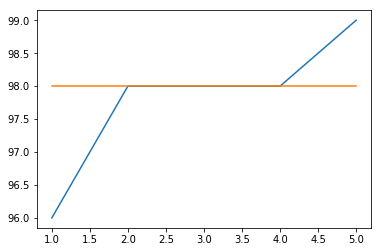

In [61]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Random seed
torch.manual_seed(1)
np.random.seed(1)
# Batch size
batch_size = 5
# Transformation to tensor and normalization
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
# Download the training set
trainset = torchvision.datasets.EMNIST(root='./data', split='digits', train=True, download=True, transform=transform)
# Training set loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False)
# Test set
testset = torchvision.datasets.EMNIST(root='./data', split='digits', train=False, download=True, transform=transform)
# Test set loader
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Function to show images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# end imshow

# Classes
classes = ('Zero - 0', 
           'One - 1', 
           'Two - 2', 
           'Three - 3', 
           'Four - 4', 
           'Five - 5', 
           'Size - 6', 
           'Seven - 7', 
           'Eight - 8', 
           'Nine - 9')
# Data set as iterator
dataiter = iter(trainloader)
#Get next batch
images, labels = dataiter.next()
# N batches
n_batches = len(dataiter)
# Our neural net, run it on CUDA GPU
net = Net()
net.cuda()
# Objective function is cross-entropy
criterion = nn.CrossEntropyLoss()
# Learning rate
learning_rate = 0.005
# Stochastic gradient descent
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# N iterations
n_iterations = 5
# List of training and test accuracies
train_accuracies = np.zeros(n_iterations)
test_accuracies = np.zeros(n_iterations)

# Training
for epoch in range(n_iterations):
    # Average loss during training
    average_loss = 0.0
    # Data to compute accuracy
    total   = 0
    success = 0

    # Iterate over batches
    for i, data in enumerate(trainloader, 0):
        # Get the inputs and labels
        inputs, labels = data
        # To variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        # Put grad to zero
        optimizer.zero_grad()
        # Forward
        outputs = net(inputs)
        # Loss
        loss = criterion(outputs, labels)
        # Backward
        loss.backward()
        # Optimize
        optimizer.step()
        # Add to loss
        average_loss += loss.data
        # Take the max as predicted
        _, predicted = torch.max(outputs.data, 1)
        # Add to total
        total += labels.size(0)
        # Add correctly classified images
        success += (predicted == labels.data).sum()
    # end for
    train_accuracy = 100.0 * success / total

    # Test model on test set
    success = 0
    total = 0
    for (inputs, labels) in testloader:
        # To variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        # Neural net's outputs
        outputs = net(inputs)
        # Take the max as predicted
        _, predicted = torch.max(outputs.data, 1)
        # Add to total
        total   += labels.size(0)
        # Add correctly classified images
        success += (predicted == labels.data).sum()
    # end for

    # print average loss and accuracies
    print(u"Epoch {}, average loss {}, train accuracy {}, test accuracy {}".format(
        epoch,
        average_loss / n_batches,
        train_accuracy,
        100.0 * success / total
    ))

    # Save
    train_accuracies[epoch] = train_accuracy
    test_accuracies[epoch] = 100.0 * success / total
# end for

plt.plot(np.arange(1, n_iterations+1), train_accuracies)
plt.plot(np.arange(1, n_iterations+1), test_accuracies)
plt.show()

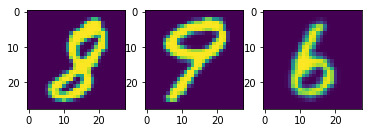

In [60]:
%matplotlib inline
fig, (ax0,ax1,ax2) = plt.subplots(1,3)

ax0.imshow((iter(trainloader).next()[0][0][0]).numpy().T)
ax1.imshow((iter(trainloader).next()[0][1][0]).numpy().T)
ax2.imshow((iter(trainloader).next()[0][2][0]).numpy().T)